# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Watermark" data-toc-modified-id="Watermark-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Watermark</a></div><div class="lev1 toc-item"><a href="#Imports-and-Setups" data-toc-modified-id="Imports-and-Setups-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports and Setups</a></div><div class="lev3 toc-item"><a href="#Autoimport-my-code" data-toc-modified-id="Autoimport-my-code-201"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Autoimport my code</a></div><div class="lev3 toc-item"><a href="#Plotting" data-toc-modified-id="Plotting-202"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Plotting</a></div><div class="lev1 toc-item"><a href="#Description" data-toc-modified-id="Description-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Description</a></div><div class="lev1 toc-item"><a href="#Communities-of-lncRNAs" data-toc-modified-id="Communities-of-lncRNAs-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Communities of lncRNAs</a></div><div class="lev1 toc-item"><a href="#2x2" data-toc-modified-id="2x2-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>2x2</a></div><div class="lev1 toc-item"><a href="#to-illustrator" data-toc-modified-id="to-illustrator-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>to illustrator</a></div><div class="lev1 toc-item"><a href="#With-mouse" data-toc-modified-id="With-mouse-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>With mouse</a></div><div class="lev1 toc-item"><a href="#Kmers" data-toc-modified-id="Kmers-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Kmers</a></div><div class="lev2 toc-item"><a href="#Smoothed" data-toc-modified-id="Smoothed-81"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Smoothed</a></div><div class="lev1 toc-item"><a href="#Nature-Genetics-fix" data-toc-modified-id="Nature-Genetics-fix-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Nature Genetics fix</a></div>

# Watermark

In [2]:
%load_ext watermark
%watermark -a 'Jessime Kirk' -nmv --packages numpy,scipy,pandas,scikit-learn,matplotlib,seaborn,networkx,notebook,jupyter_contrib_nbextensions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Jessime Kirk Mon Oct 31 2016 

CPython 2.7.12
IPython 5.1.0

numpy 1.11.1
scipy 0.18.1
pandas 0.18.1
scikit-learn 0.17.1
matplotlib 1.5.3
seaborn 0.7.1
networkx 1.11
notebook 4.2.3
jupyter_contrib_nbextensions 0.2.1

compiler   : GCC 4.4.7 20120313 (Red Hat 4.4.7-1)
system     : Linux
release    : 4.4.8-040408-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


# Imports and Setups

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import networkx as nx

from tqdm import tqdm, trange, tqdm_notebook, tnrange

from scipy.stats import pearsonr

### Autoimport my code

In [2]:
pwd

'/home/jessime/Code/kmers3/Notebooks'

In [3]:
cd ..

/home/jessime/Code/kmers3


In [4]:
%load_ext autoreload

In [6]:
%autoreload 2

### Plotting

In [7]:
%matplotlib inline
plt.style.use('seaborn-white')
sns.set_palette('colorblind')
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]

# Description

This is a cleaner version of the original. This notebook is different than my monthly ones, so it's taking a few iterations to make it quality.

To make my code cleaner, I want to set up a skeleton of every axes. The numbers will be different for each axes.

* Plot/Scatter/etc. (main function)
* Both axes
  * locator_params
* xaxis stuff
  * visibility
  * xlim
  * xlabel
  * xticks
* yaxis stuff
  * repeat
* legend
* saving

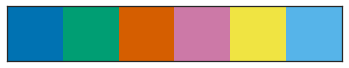

In [7]:
sns.palplot(sns.color_palette('colorblind'))

In [8]:
#rgb values = [(191,87,255), (92,186,255), (255,69,10)]
network_pal = sns.color_palette(['#bf57ff', '#5cbaff', '#ff450a', '#18ad00', '#ebe100', '#0067a8'])

[(0.7490196078431373, 0.3411764705882353, 1.0), (0.3607843137254902, 0.7294117647058823, 1.0), (1.0, 0.27058823529411763, 0.0392156862745098), (0.09411764705882353, 0.6784313725490196, 0.0), (0.9215686274509803, 0.8823529411764706, 0.0), (0.0, 0.403921568627451, 0.6588235294117647)]


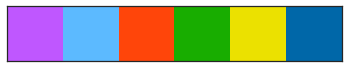

In [10]:
print network_pal
sns.palplot(network_pal)

# Communities of lncRNAs

In [9]:
#code
groups_index = cPickle.load(open('/home/jessime/Research/fig_data/groups_index.txt', 'rb'))

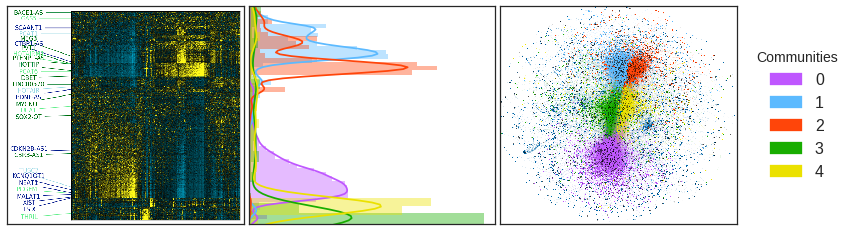

In [22]:
#plotting
outfile_communities = '/home/jessime/Research/pics/paper/communities2.png'

fig = plt.figure(figsize=(13.25, 4))
gs = mpl.gridspec.GridSpec(1,3, wspace=0)

#Heatmap
#=======
ax0 = plt.subplot(gs[0, 0])
treeview = '/home/jessime/Research/pics/regulatory_lncRNA_heatmap2.png'
ax0 = ax0.imshow(plt.imread(treeview))
#x
ax0.axes.xaxis.set_ticklabels([])
#ax0.axes.set_xlabel('kmers (k=6, n=4096)')
#y
ax0.axes.yaxis.set_ticklabels([])
#ax0.axes.set_ylabel('lncRNAs (n=15953)')
#============

#Density Map
#============
ax1 = plt.subplot(gs[0, 1])
for i in range(5):
    ax1 = sns.distplot(groups_index[i], vertical=True, color=network_pal[i], ax=ax1)
#x
ax1.xaxis.set_ticklabels([])
#y
ax1.set_ylim([0, 15953])
ax1.set_ylabel('Index')
ax1.yaxis.set_visible(False)
handles = []
for i in range(5):
    patch = mpl.patches.Patch(color=network_pal[i], label=str(i))
    handles.append(patch)
legend = ax1.legend(handles=handles, loc='center left', bbox_to_anchor=(2, 0.5))
legend.set_title('Communities', {'size':14})

#Network
#============
ax2 = plt.subplot(gs[0, 2])
gephi = '/home/jessime/Research/pics/HvH01_p13_main_TV_scale2.tiff'
ax2 = ax2.imshow(plt.imread(gephi))
#x
ax2.axes.xaxis.set_ticklabels([])
#y
ax2.axes.yaxis.set_ticklabels([])
#============

plt.savefig(outfile_communities, bbox_inches='tight', dpi=600)
plt.show()

# 2x2

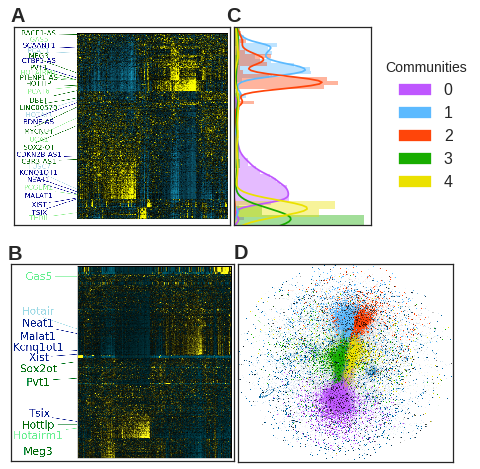

In [53]:
#plotting
outfile_communities2x2 = '/home/jessime/Research/pics/paper/communities2x2-2.png'

fig = plt.figure(figsize=(8, 8))
gs = mpl.gridspec.GridSpec(2,2, wspace=0)

# Human Heatmap
#=======
ax0 = plt.subplot(gs[0, 0])
treeview = '/home/jessime/Research/pics/regulatory_lncRNA_heatmap3.png'
ax0 = ax0.imshow(plt.imread(treeview))
#x
ax0.axes.xaxis.set_ticklabels([])
#y
ax0.axes.yaxis.set_ticklabels([])
#============

#Density Map
#============
ax1 = plt.subplot(gs[0, 1])
for i in range(5):
    ax1 = sns.distplot(groups_index[i], vertical=True, color=network_pal[i], ax=ax1)
#x
ax1.xaxis.set_ticklabels([])
#y
ax1.set_ylim([0, 15953])
ax1.set_ylabel('Index')
ax1.yaxis.set_visible(False)
handles = []
for i in range(5):
    patch = mpl.patches.Patch(color=network_pal[i], label=str(i))
    handles.append(patch)
legend = ax1.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title('Communities', {'size':14})
pos = ax1.get_position()
pos.x1 = .75
ax1.set_position(pos)
# # Mouse Heatmap
# #=======
ax2 = plt.subplot(gs[1, 0])
treeview = '/home/jessime/Research/pics/regulatory_M5_heatmap2.png'
ax2 = ax2.imshow(plt.imread(treeview))
#x
ax2.axes.xaxis.set_ticklabels([])
#ax0.axes.set_xlabel('kmers (k=6, n=4096)')
#y
ax2.axes.yaxis.set_ticklabels([])
#ax0.axes.set_ylabel('lncRNAs (n=15953)')

#Network
#============
ax3 = plt.subplot(gs[1, 1])
gephi = '/home/jessime/Research/pics/HvH01_p13_main_TV_scale2.tiff'
ax3 = ax3.imshow(plt.imread(gephi))
#x
ax3.axes.xaxis.set_ticklabels([])
#y
ax3.axes.yaxis.set_ticklabels([])
#============

for ax, label in zip([ax0, ax1, ax2, ax3], 'ACBD'):
    ax.axes.text(.05, 1.10, label, transform=ax.axes.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')
plt.savefig(outfile_communities2x2, bbox_inches='tight', dpi=600)
plt.show()

# to illustrator

I actually only need the distplot here.

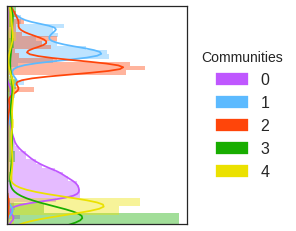

In [16]:
fig = plt.figure(figsize=(4, 4))
gs = mpl.gridspec.GridSpec(1,1, wspace=0)
ax1 = plt.subplot(gs[0, 0])
for i in range(5):
    ax1 = sns.distplot(groups_index[i], vertical=True, color=network_pal[i], ax=ax1)
#x
ax1.xaxis.set_ticklabels([])
#y
ax1.set_ylim([0, 15953])
ax1.set_ylabel('Index')
ax1.yaxis.set_visible(False)
handles = []
for i in range(5):
    patch = mpl.patches.Patch(color=network_pal[i], label=str(i))
    handles.append(patch)
legend = ax1.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5))
legend.set_title('Communities', {'size':14})
pos = ax1.get_position()
pos.x1 = .75
ax1.set_position(pos)

plt.savefig('/home/jessime/Research/pics/paper/pdfs/communities_dist.pdf', bbox_inches='tight', dpi=600)
plt.show()

# With mouse

We are going to include mouse in the figure as well, possibly, instead of the supplimental.

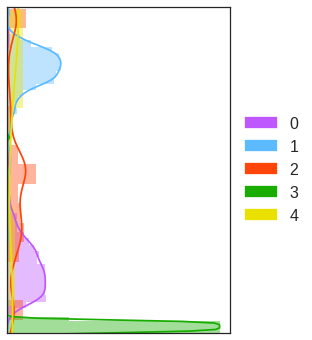

In [12]:
ax, fig = plt.subplots(figsize=[4,6])

network_pal = sns.color_palette(['#bf57ff', '#5cbaff', '#ff450a', '#18ad00', '#ebe100', '#0067a8'])
groups_index = cPickle.load(open('/home/jessime/Research/fig_data/groups_index_M5.txt', 'rb'))
for i in range(5):
    sns.distplot(groups_index[i], vertical=True, color=network_pal[i], label=str(i))
plt.ylim([0, 8252])
plt.xticks([])
plt.yticks([])
handles = []
for i in range(5):
    patch = mpl.patches.Patch(color=network_pal[i], label=str(i))
    handles.append(patch)
plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('/home/jessime/Research/pics/paper/pdfs/M5_communities_dist.pdf', bbox_inches='tight', dpi=600)
plt.show()

# Kmers

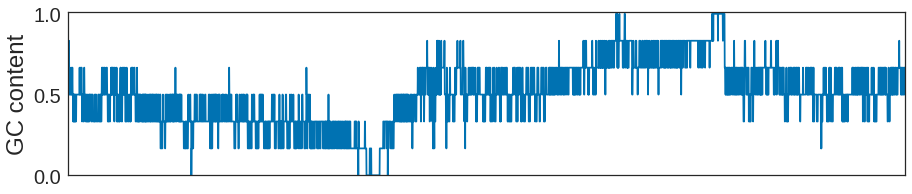

In [7]:
v22_heatmap_kmers = cPickle.load(open('/home/jessime/Research/fig_data/v22_heatmap_kmers.txt', 'rb'))
plt.figure(figsize=(15,3))
plt.plot(range(len(v22_heatmap_kmers)), v22_heatmap_kmers)
plt.xlim([0, 4096])
plt.ylim([0, 1.01])
plt.xticks([])
plt.tick_params(labelsize=20)
plt.ylabel('GC content', fontsize=24)
plt.savefig('/home/jessime/Research/pics/paper/pdfs/v22_heatmap_kmers.pdf', bbox_inches='tight', dpi=600)
plt.show()

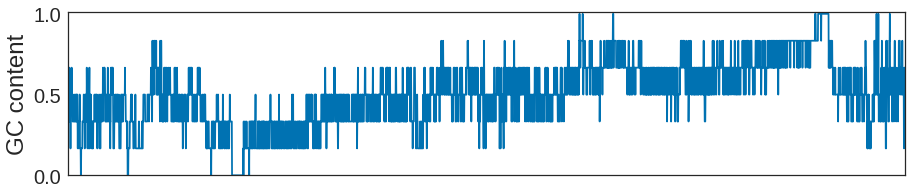

In [8]:
M5_heatmap_kmers = cPickle.load(open('/home/jessime/Research/fig_data/M5_heatmap_kmers.txt', 'rb'))
plt.figure(figsize=(15,3))
plt.plot(range(len(M5_heatmap_kmers)), M5_heatmap_kmers)
plt.xlim([0, 4096])
plt.ylim([0, 1.01])
plt.xticks([])
plt.tick_params(labelsize=20)
plt.ylabel('GC content', fontsize=24)
plt.savefig('/home/jessime/Research/pics/paper/pdfs/M5_heatmap_kmers.pdf', bbox_inches='tight', dpi=600)
plt.show()

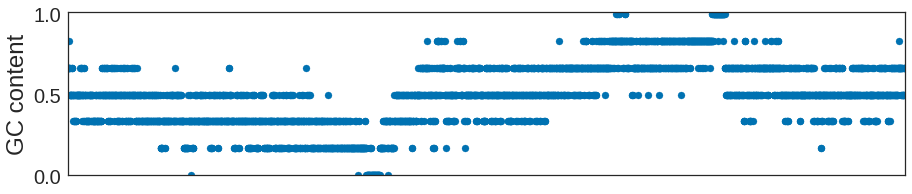

In [9]:
v22_heatmap_kmers = cPickle.load(open('/home/jessime/Research/fig_data/v22_heatmap_kmers.txt', 'rb'))
plt.figure(figsize=(15,3))
plt.scatter(range(len(v22_heatmap_kmers)), v22_heatmap_kmers)
plt.xlim([0, 4096])
plt.ylim([0, 1.01])
plt.xticks([])
plt.tick_params(labelsize=20)
plt.ylabel('GC content', fontsize=24)
plt.savefig('/home/jessime/Research/pics/paper/pdfs/v22_heatmap_kmers2.pdf', bbox_inches='tight', dpi=600)
plt.show()

## Smoothed

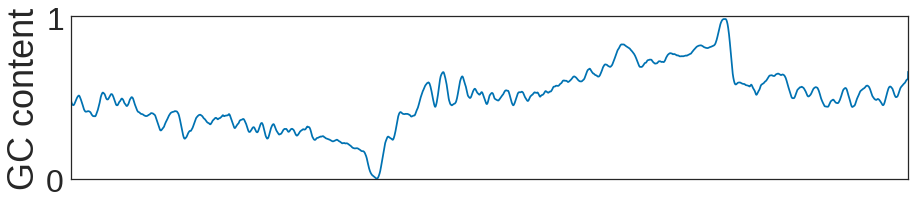

In [15]:
v22_heatmap_kmers = pd.read_csv('/home/jessime/Research/fig_data/v22_heatmap_kmers_df.csv', index_col=0)
plt.figure(figsize=(15,3))
plt.plot(range(len(v22_heatmap_kmers)), v22_heatmap_kmers.Smooth)
plt.xlim([0+25, 4096-25])
plt.ylim([0, 1.01])
plt.xticks([])
plt.tick_params(labelsize=32)
plt.ylabel('GC content', fontsize=36)
plt.savefig('/home/jessime/Research/pics/paper/pdfs/v22_heatmap_kmers2.pdf', bbox_inches='tight', dpi=600)
plt.show()

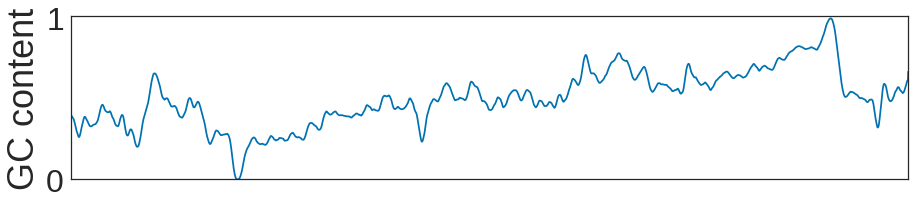

In [17]:
M5_heatmap_kmers = pd.read_csv('/home/jessime/Research/fig_data/M5_heatmap_kmers_df.csv', index_col=0)
plt.figure(figsize=(15,3))
plt.plot(range(len(M5_heatmap_kmers)), M5_heatmap_kmers.Smooth)
plt.xlim([0+25, 4096-25])
plt.ylim([0, 1.01])
plt.xticks([])
plt.tick_params(labelsize=32)
plt.ylabel('GC content', fontsize=36)
plt.savefig('/home/jessime/Research/pics/paper/pdfs/M5_heatmap_kmers2.pdf', bbox_inches='tight', dpi=600)
plt.show()

# Nature Genetics fix

Welp, we messed up. I forgot to update the distributions. I'm going to do the file processing here along with the graph generation. It doesn't make a lot of sense to do it in my main notebook.

In [18]:
v22_tv_list = '/home/jessime/Research/treeview/6mers01_v22_std3_list.txt'
with open(v22_tv_list) as v22_tv_list:
    v22_tv_list = [n.strip() for n in v22_tv_list.readlines()]
    
v22_groups = '/home/jessime/Research/groups.csv'
v22_groups = pd.read_csv(v22_groups, index_col=0)

v22_group_distros = []

for i in range(6):
    df = v22_groups[v22_groups['Group'] == i]
    df = df[~df.index.str.endswith('01B')]
    locs = [v22_tv_list.index(n) for n in df.index]
    v22_group_distros.append(locs)
    
v22_out = '/home/jessime/Research/treeview/6mers01_v22_std3_distros.pkl'
pickle.dump(v22_group_distros, open(v22_out, 'wb'))

print(len(v22_group_distros))
v22_group_distros[0][:5]

6


[6377, 11477, 11950, 10100, 12946]

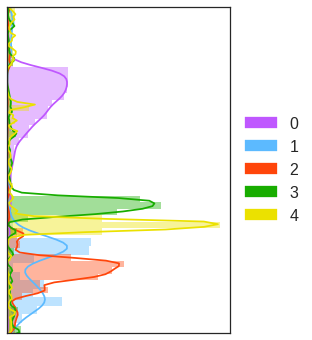

In [20]:
ax, fig = plt.subplots(figsize=[4,6])

network_pal = sns.color_palette(['#bf57ff', '#5cbaff', '#ff450a', '#18ad00', '#ebe100', '#0067a8'])

groups_index = '/home/jessime/Research/treeview/6mers01_v22_std3_distros.pkl'
groups_index = pickle.load(open(groups_index, 'rb'))
for i in range(5):
    sns.distplot(groups_index[i], vertical=True, color=network_pal[i], label=str(i))
plt.ylim([0, 15953])
plt.xticks([])
plt.yticks([])
handles = []
for i in range(5):
    patch = mpl.patches.Patch(color=network_pal[i], label=str(i))
    handles.append(patch)
plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5))
outfile = '/home/jessime/Research/pics/paper/v22_communities_dist2.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

This looks good but will have to be flipped upside down for the paper.

6
[7014, 6086, 6887, 6850, 7054]


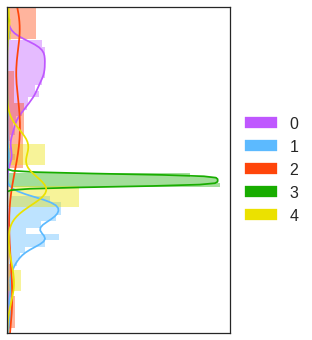

In [22]:
M5_tv_list = '/home/jessime/Research/treeview/6mers01_M5_extend3_norm_list.txt'
with open(M5_tv_list) as M5_tv_list:
    M5_tv_list = [n.strip() for n in M5_tv_list.readlines()]
    
M5_groups = '/home/jessime/Research/groups_M5.csv'
M5_groups = pd.read_csv(M5_groups, index_col=0)

M5_group_distros = []

for i in range(6):
    df = M5_groups[M5_groups['Group'] == i]
    df = df[~df.index.str.endswith('01B')]
    locs = [M5_tv_list.index(n) for n in df.index]
    M5_group_distros.append(locs)
    
M5_out = '/home/jessime/Research/treeview/6mers01_M5_extend3_norm_distros.pkl'
pickle.dump(M5_group_distros, open(M5_out, 'wb'))

print(len(M5_group_distros))
print(M5_group_distros[0][:5])

ax, fig = plt.subplots(figsize=[4,6])

network_pal = sns.color_palette(['#bf57ff', '#5cbaff', '#ff450a', '#18ad00', '#ebe100', '#0067a8'])

groups_index = '/home/jessime/Research/treeview/6mers01_M5_extend3_norm_distros.pkl'
groups_index = pickle.load(open(groups_index, 'rb'))
for i in range(5):
    sns.distplot(groups_index[i], vertical=True, color=network_pal[i], label=str(i))
plt.ylim([0, 8252])
plt.xticks([])
plt.yticks([])
handles = []
for i in range(5):
    patch = mpl.patches.Patch(color=network_pal[i], label=str(i))
    handles.append(patch)
plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5))
outfile = '/home/jessime/Research/pics/paper/M5_communities_dist2.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()